<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/FYP_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'file': <_io.BufferedReader name='img0032 (2).jpeg'>}
{"message":"Success","result":[{"message":"Success","input":"img0032 (2).jpeg","prediction":[{"label":"bottle","xmin":236,"ymin":87,"xmax":467,"ymax":287,"score":0.9976624}]}]}
[(351, 187)]
{'file': <_io.BufferedReader name='img0018 (3).jpeg'>}
{"message":"Success","result":[{"message":"Success","input":"img0018 (3).jpeg","prediction":[{"label":"bottle","xmin":0,"ymin":81,"xmax":540,"ymax":270,"score":0.9990127}]}]}
[(270, 175)]
{'file': <_io.BufferedReader name='img0029.jpeg'>}
{"message":"Success","result":[{"message":"Success","input":"img0029.jpeg","prediction":[{"label":"bottle","xmin":48,"ymin":74,"xmax":581,"ymax":231,"score":0.9975151},{"label":"bottle","xmin":270,"ymin":53,"xmax":584,"ymax":236,"score":0.6196156}]}]}
[(314, 152), (427, 144)]
49.40445041656494


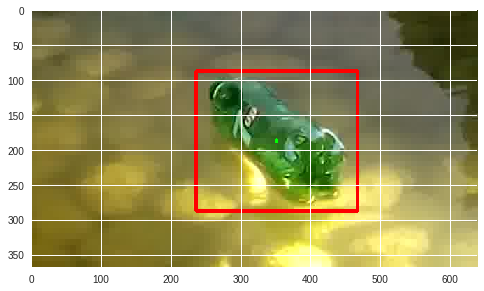

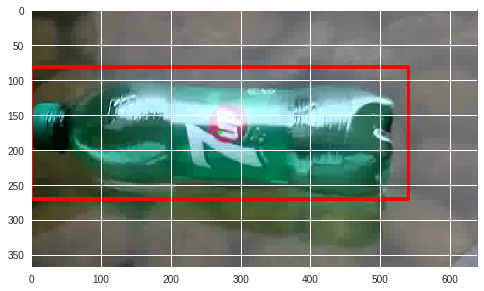

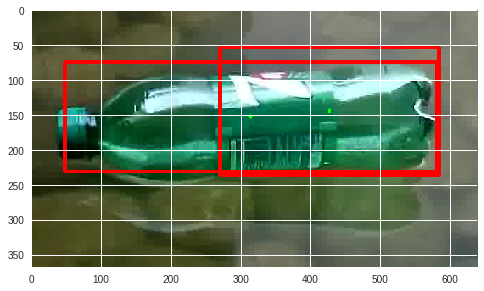

In [0]:
import requests

url = 'https://app.nanonets.com/api/v2/ObjectDetection/Model/a182ab9c-231b-49f8-9d38-663f3f9bc858/LabelFile/'

#url = 'https://app.nanonets.com/api/v2/ObjectDetection/Model/6ee9b4ff-8768-4830-8abd-36e4e64327af/LabelFile/'

def nanonets_detector(image_path):
  data = {'file': open(image_path, 'rb')}

  print(data)
  response = requests.post(url, auth=requests.auth.HTTPBasicAuth('4lJfob3n6oBRen5AVvsBTN7llzM6wkCB', ''), files=data)
  #response = requests.post(url, auth=requests.auth.HTTPBasicAuth('K_AAbygpXX05Bp8BojnENlhUw69_a0HW', ''), files=data)
  print(response.text)
  message = response.text
  
  det = []
  
  if "Success" in message:
    x = message.split("label")
    for j in x:
      if j.find("xmin") != -1:  
        a = j.find("xmin")
        b = j.find("ymin")
        c = j.find("xmax")
        d = j.find("ymax")
        e = j.find("score")
        f = (j[a+6:b-2])
        g = (j[b+6:c-2])
        h = (j[c+6:d-2])
        i = (j[d+6:e-2])
        det.append([f, g, h, i])
        #print(a, b, c, d, e, f, g, h, i)

  centers = []
  for i in det:
    center = (int((int(i[0]) + int(i[2]))/2)), int(((int(i[1]) + int(i[3]))/2))
    centers.append(center)

  print(centers)

  import numpy as np
  import cv2
  import matplotlib.pyplot as plt

  #j = cv2.imread('D:\\DownloadsNew\\cover002.png')
  j = cv2.imread(image_path)
  k = cv2.cvtColor(j, cv2.COLOR_BGR2RGB)

  for i in range(len(det)):
    k = cv2.rectangle(k, (int(det[i][0]), int(det[i][1])), (int(det[i][2]), int(det[i][3])), (255, 0, 0), 3)
    cv2.circle(k, centers[i], 3, (0, 255, 0), -1)

  plt.figure()
  plt.imshow(k)  
  
  return centers
import time
x = time.time()
nanonets_detector('img0032 (2).jpeg')
nanonets_detector('img0018 (3).jpeg')
nanonets_detector('img0029.jpeg')
print(time.time() - x)

In [0]:
def search(goal):
        #open list elements are of the type: [g,x,y]
    for j in range(len(goal)):        
        closed =[[0 for row in range(len(grid[0]))] for col in range(len(grid))] #closed: keeps check for visited nodes
        closed[init[0]][init[1]]=1
        expand =[[-1 for row in range(len(grid[0]))] for col in range(len(grid))] #cost of node traversal
        action= [[-1 for row in range(len(grid[0]))] for col in range(len(grid))] #while element in delta caused the movement 
        
        x=init[0]
        y=init[1]
        g=0
        
        open = [[g,x,y]]
        
        found = False #flag that is set when search complete
        resign = False #flag set if we can't find the goal and the search space is exhausted
        count = 0  # no of steps taken to do the entire search
        
        print ('initial open list:')
        #for i in range (len(open)):
          #print'  ', open[i]
        #print '____'
        
        while found is False and resign is False:
            
            #check if we still have elements on the open list
            if len(open) ==0:
                resign = True
                print ('fail')
                #print '###### Search terminated without success'
                
            else:
                #remove nide from list
                open.sort()
                open.reverse()
                next=open.pop()
                #print 'take list item'
                #print next
                x=next[1]
                y=next[2]
                g=next[0]
                expand[x][y]=count
                count+=1
                
                #check if we are done
                #print(j)
                if x == goal[j][0] and y==goal[j][1]: #starting node=goal node
                    found = True
                    print (next)
                    #init[0] = x
                    #nit[1] = y
                    #init_2 = [x, y]
                    #print '###### Search sucessful'
                    
                else:
                    #expand winning element and add to new open list
                    for i in range (len(delta)):
                        x2 = x + delta[i][0]
                        y2 = y + delta[i][1]
                        if x2 >=0 and x2 <len(grid) and y2 >=0 and y2 < len(grid[0]):
                            if closed[x2][y2] == 0 and grid[x2][y2] ==0:
                                g2 = g +cost
                                open.append([g2, x2, y2])
                                #print 'append list item'
                                #print ([g2,x2,y2])
                                closed[x2][y2]=1
                                action[x2][y2]=i
                                
                        #print 'new open lists:'
                        #fpr i in range (len(open)):
                           #print '  ', open [i]
                        #print'----'
                        
                #for i in range(len(expand)):   #expand:at what step each node was expanded
                    #print (expand[i])
                        
                    
        policy = [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]
        x= goal[j][0]
        y= goal[j][1]
        policy[x][y] = '*'
        while x != init[0] or y !=init[1]:
            x2 = x - delta[action[x][y]][0]
            y2 = y - delta[action[x][y]][1]
            policy[x2][y2]=delta_name[action[x][y]]
            x=x2
            y=y2
            
        for i in range(len(policy)):
            print (policy[i])
        init[0] = goal[j][0]
        init[1] = goal[j][1] 
        


In [0]:
grid = [[0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],]

init= [4,2]

init_2 = [4, 2]

goal = []

#for i in centers:
#  goal.append([i[1]//100,i[0]//100])

#goal= [[center[1]//100,center[0]//100], [0, 5], [0, 0], [0, 5], [0, 5]]

#print(goal)
delta=[[-1,0], #go up
       [0,-1], #go left
       [1, 0], #go down
       [0, 1]] #go right

delta_name=['^','<','v','>']

cost=1

centers = [[0, 0], [4, 4]]
#centers = nanonets_detector("download_3.jpg")
search(centers)

initial open list:
[6, 0, 0]
['*', '<', '<', ' ', ' ', ' ']
[' ', ' ', '^', ' ', ' ', ' ']
[' ', ' ', '^', ' ', ' ', ' ']
[' ', ' ', '^', ' ', ' ', ' ']
[' ', ' ', '^', ' ', ' ', ' ']
initial open list:
[8, 4, 4]
['>', '>', '>', '>', 'v', ' ']
[' ', ' ', ' ', ' ', 'v', ' ']
[' ', ' ', ' ', ' ', 'v', ' ']
[' ', ' ', ' ', ' ', 'v', ' ']
[' ', ' ', ' ', ' ', '*', ' ']


{'file': <_io.BufferedReader name='frame0.jpg'>}
{"message":"Success","result":[{"message":"Success","input":"frame0.jpg","prediction":[{"label":"bottle","xmin":0,"ymin":0,"xmax":177,"ymax":57,"score":0.9725896}]}]}
[(88, 28)]
{'file': <_io.BufferedReader name='frame200.jpg'>}
{"message":"Success","result":[{"message":"Success","input":"frame200.jpg","prediction":[{"label":"bottle","xmin":196,"ymin":69,"xmax":317,"ymax":117,"score":0.9849872},{"label":"bottle","xmin":411,"ymin":56,"xmax":451,"ymax":102,"score":0.8567443}]}]}
[(256, 93), (431, 79)]
{'file': <_io.BufferedReader name='frame400.jpg'>}
{"message":"Success","result":[{"message":"Success","input":"frame400.jpg","prediction":[{"label":"bottle","xmin":351,"ymin":54,"xmax":444,"ymax":99,"score":0.99740124},{"label":"bottle","xmin":185,"ymin":77,"xmax":310,"ymax":119,"score":0.98710954},{"label":"bottle","xmin":472,"ymin":59,"xmax":509,"ymax":105,"score":0.8483816},{"label":"bottle","xmin":597,"ymin":1,"xmax":636,"ymax":17,"score

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


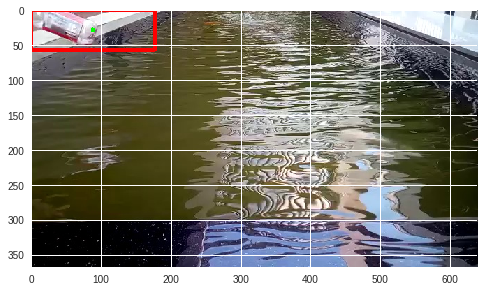

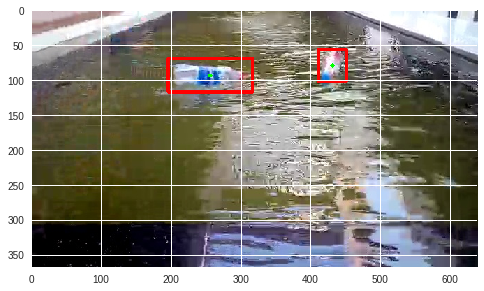

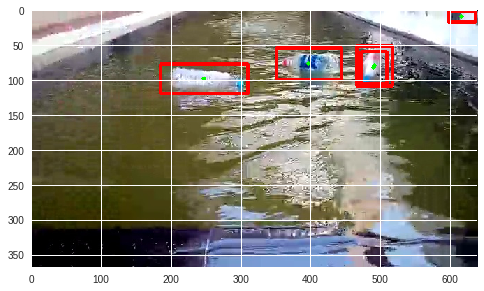

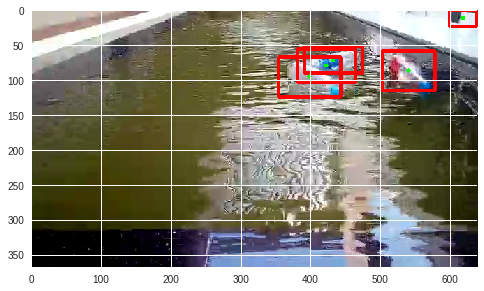

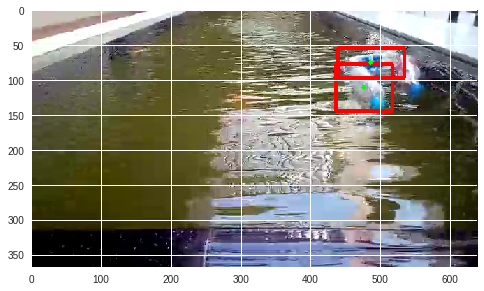

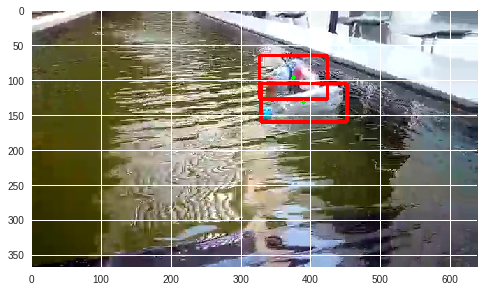

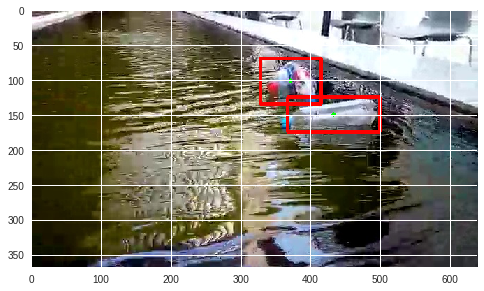

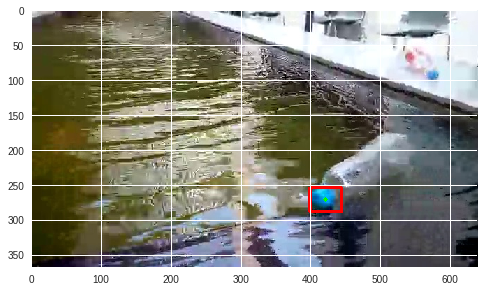

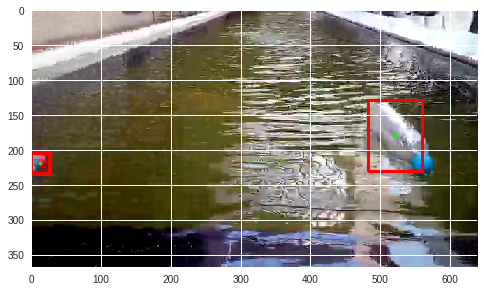

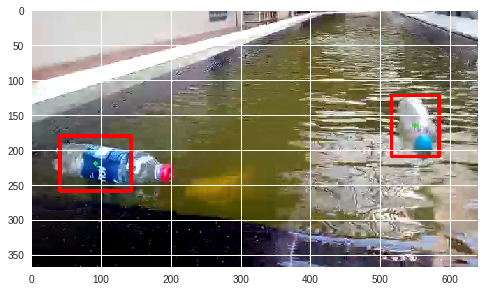

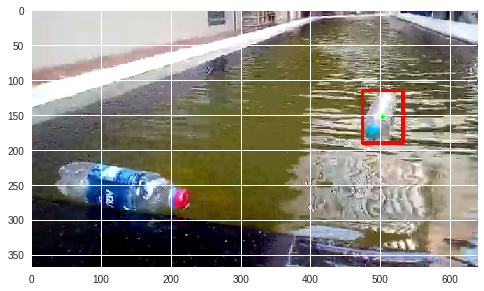

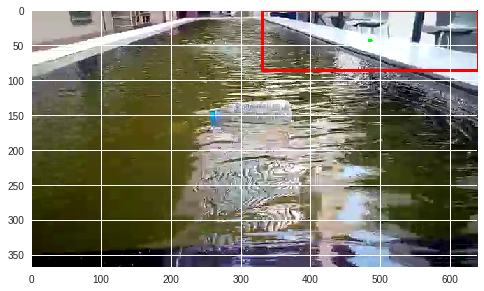

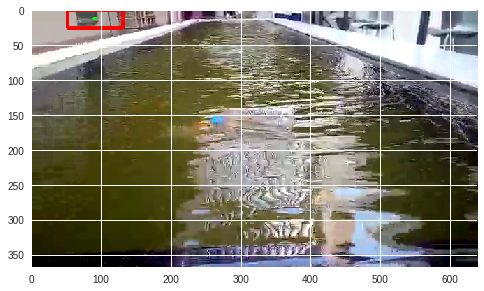

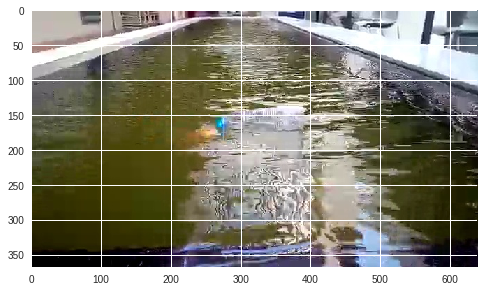

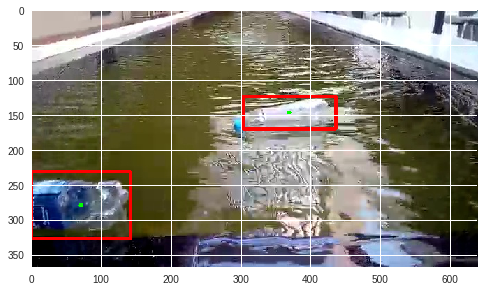

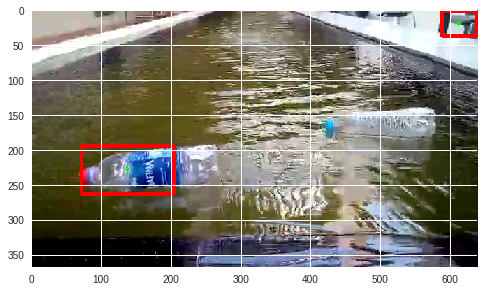

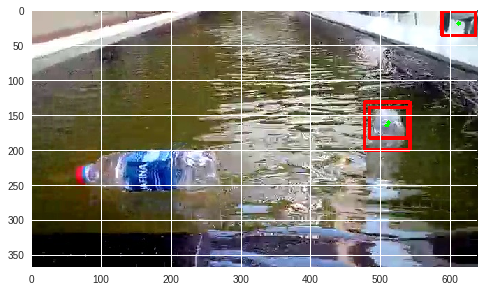

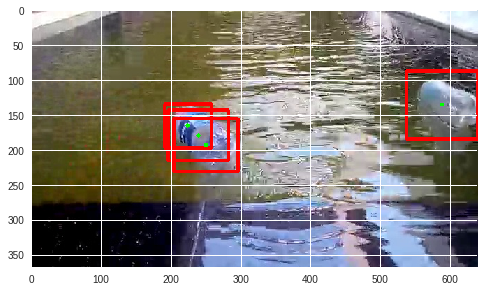

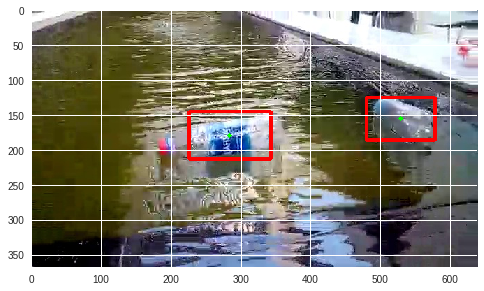

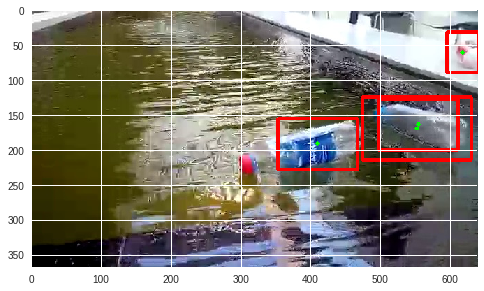

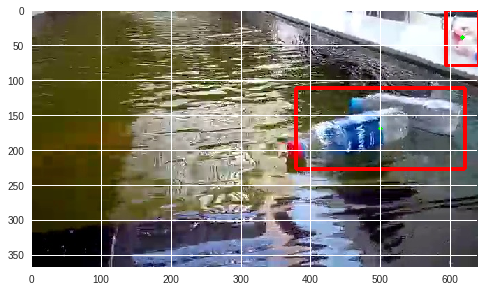

In [0]:
import cv2
import matplotlib.pyplot as plt

capture = cv2.VideoCapture('VID-20190310-WA0002.mp4')    
i = 0
while True:
    ret, frame = capture.read()
    # Bail out when the video file ends
    if not ret:
        break        
    # Save each frame of the video to a list
    #plt.figure()
    #plt.imshow(frame)
    if i % 200 == 0:
      cv2.imwrite("frame" + str(i) + ".jpg", frame)
      nanonets_detector("frame" + str(i) + ".jpg")
      #plt.figure()
      #plt.imshow(frame)
    i += 1
    #if i == 5:
    #  break
print(i)

In [0]:
import urllib
import cv2
import numpy as np
url='http://192.168.0.108:5000/'

while True:
  print(1)
  # Use urllib to get the image and convert into a cv2 usable format
  imageResp=urllib.request.urlopen(url)
  print(imageResp)
  imgNp=np.array(bytearray(imageResp.read()),dtype=np.uint8)
  print(imgNp.shape)
  img=cv2.imdecode(imgNp,-1)
  #print(img.shape)
  # put the image on screen
  a = []
  for i in range(1, imgNp.shape[0]):
    if imgNp.shape[0] % i == 0:
      a.append(i)
  print(a)
  plt.imshow(imgNp.reshape(a[-4], -1))

  #To give the processor some less stress
  break




1


URLError: ignored

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

url = "http://192.168.0.103:8080/shot.jpg"
print(1)
img_resp = requests.get(url)
print(1)
img_arr = np.array(bytearray(img_resp.content), dtype = uint8)
img = cv2.imdecode(img_arr, -1)
  

1


ConnectionError: ignored

In [0]:
!pip install requests

In [0]:
a = []
for i in range(1, 207388):
  if 207388 % i == 0:
    print(207388/i)
    a.append(i)
    
print(a)

207388.0
103694.0
51847.0
1492.0
746.0
556.0
373.0
278.0
139.0
4.0
2.0
[1, 2, 4, 139, 278, 373, 556, 746, 1492, 51847, 103694]


In [0]:
import cv2
import pafy

url = "https://www.youtube.com/watch?v=NKpuX_yzdYs"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

capture = cv2.VideoCapture()
capture.open(best.url)

success,image = capture.read()

while success:
    cv2.imshow('frame', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    success,image = capture.read()

cv2.destroyAllWindows()
capture.release()